<a href="https://colab.research.google.com/github/kinderasteroid/Neural-Networks-Classification/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification

In [3]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt


n_samp = 1000

X,y = make_circles(n_samp,noise=0.03,random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles






,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


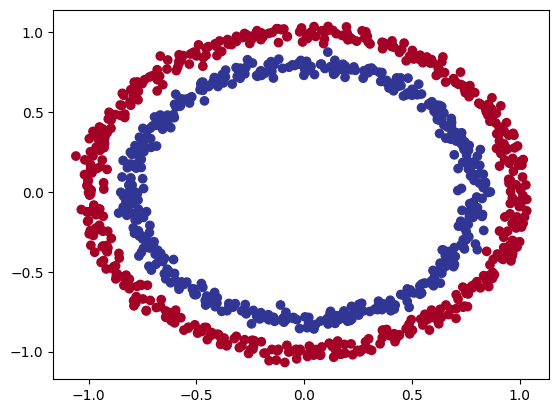

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
32/32 [==============================] - 5s 3ms/step - loss: 6.1545 - accuracy: 0.4959
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 5.5768 - accuracy: 0.5002
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 4.9061 - accuracy: 0.4992
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 4.6019 - accuracy: 0.4987
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 4.3045 - accuracy: 0.4995
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 2.9691 - accuracy: 0.5023
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.4983
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.4986
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4983
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5017
Epoch 11/

In [30]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.6977 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4960
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5040
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5030
Epoch 11/

In [31]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9990


[0.21483276784420013, 0.9990000128746033]

#Replicate the Sigmoid Function


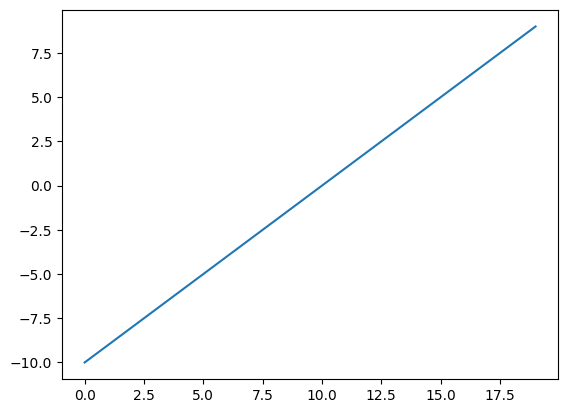

In [40]:

X = tf.cast(tf.range(-10,10),tf.float32)
plt.plot(X)

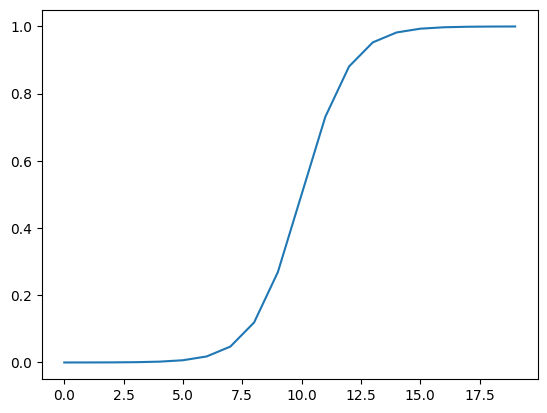

In [39]:
def sigmoid(X):
  return (1/(1+tf.math.exp(-X)))

plt.plot(sigmoid(X))

In [41]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 4)                 12        
                                                                 
 dense_68 (Dense)            (None, 4)                 20        
                                                                 
 dense_69 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


#Replicate the Relu Function


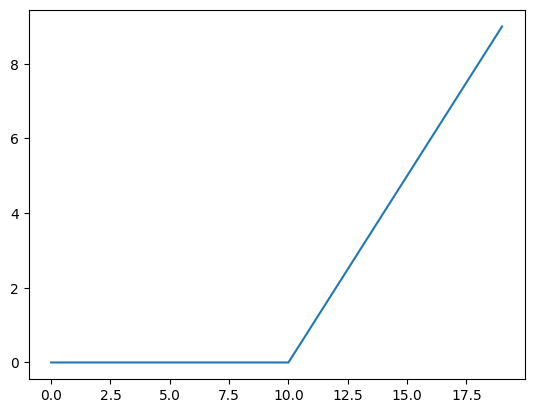

In [45]:

def relu(X):
    return(tf.maximum(X,0))

plt.plot(relu(X))